# 🔍 Streamlined EDA Analysis
## CIC-IDS-2017 Dataset for AI-based Intrusion Detection System

This notebook provides essential EDA visualizations with one clear plot per cell.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from pathlib import Path
import time
from datetime import datetime

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

print("📚 Libraries imported successfully!")
print(f"⏰ Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


📚 Libraries imported successfully!
⏰ Analysis started at: 2025-09-06 00:34:11


## 📁 Dataset Loading
Load and combine all CSV files from the CIC-IDS-2017 dataset.


In [2]:
# Load all CSV files
data_path = Path("../CIC-IDS-2017/MachineLearningCVE")
csv_files = list(data_path.glob("*.csv"))

print("📂 Loading dataset files...")
dataframes = []
file_info = []

for file in csv_files:
    print(f"📥 Loading {file.name}...")
    start_time = time.time()
    
    df = pd.read_csv(file)
    dataframes.append(df)
    
    load_time = time.time() - start_time
    file_info.append({
        'file': file.name,
        'size_mb': file.stat().st_size / (1024 * 1024),
        'records': len(df)
    })
    
    print(f"  ✅ Records: {len(df):,}, Size: {file.stat().st_size / (1024 * 1024):.1f} MB")

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)
print(f"\n✅ Combined dataset shape: {combined_df.shape}")
print(f"📊 Total records: {len(combined_df):,}")
print(f"💾 Memory usage: {combined_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📂 Loading dataset files...
📥 Loading Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv...
  ✅ Records: 225,745, Size: 73.6 MB
📥 Loading Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv...
  ✅ Records: 286,467, Size: 73.3 MB
📥 Loading Friday-WorkingHours-Morning.pcap_ISCX.csv...
  ✅ Records: 191,033, Size: 55.6 MB
📥 Loading Monday-WorkingHours.pcap_ISCX.csv...
  ✅ Records: 529,918, Size: 168.7 MB
📥 Loading Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv...
  ✅ Records: 288,602, Size: 79.3 MB
📥 Loading Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv...
  ✅ Records: 170,366, Size: 49.6 MB
📥 Loading Tuesday-WorkingHours.pcap_ISCX.csv...
  ✅ Records: 445,909, Size: 128.8 MB
📥 Loading Wednesday-workingHours.pcap_ISCX.csv...
  ✅ Records: 692,703, Size: 214.7 MB

✅ Combined dataset shape: (2830743, 79)
📊 Total records: 2,830,743
💾 Memory usage: 1833.87 MB


## 📊 File Size Distribution
Visualize the size of each dataset file to understand data distribution across days.


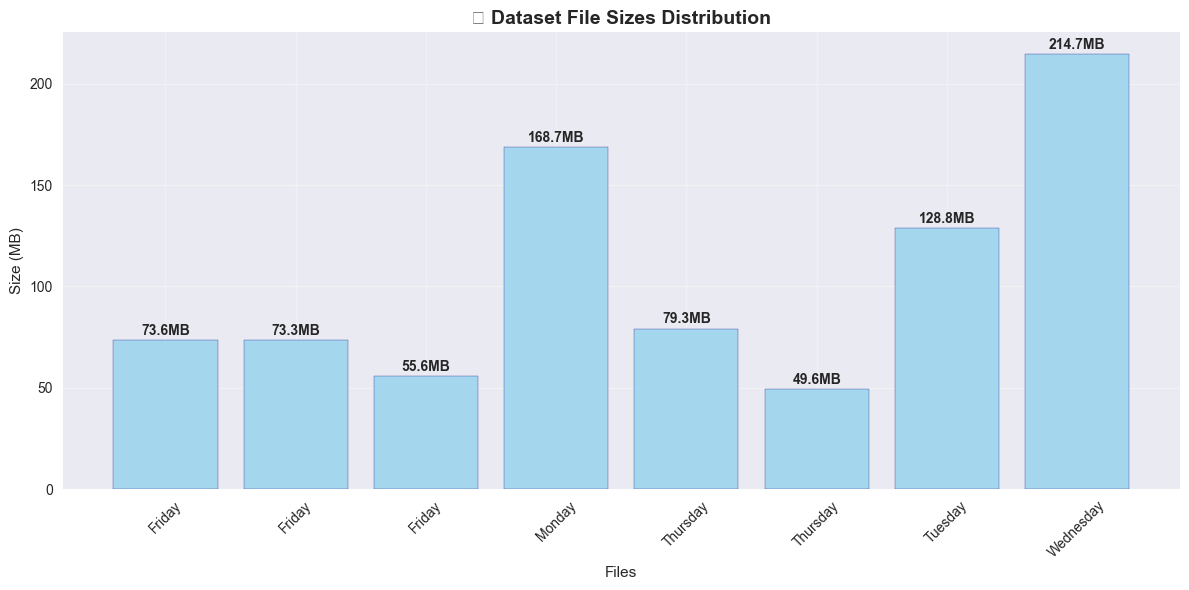

In [3]:
# File sizes bar chart
file_names = [info['file'].replace('.pcap_ISCX.csv', '') for info in file_info]
file_sizes = [info['size_mb'] for info in file_info]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(file_names)), file_sizes, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('📊 Dataset File Sizes Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Files')
plt.ylabel('Size (MB)')
plt.xticks(range(len(file_names)), [name.split('-')[0] for name in file_names], rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{file_sizes[i]:.1f}MB', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 🎯 Attack Type Distribution
Show the distribution of different attack types in the dataset to understand class imbalance.


🎯 Attack Type Distribution:
  BENIGN: 2,273,097 (80.30%)
  DoS Hulk: 231,073 (8.16%)
  PortScan: 158,930 (5.61%)
  DDoS: 128,027 (4.52%)
  DoS GoldenEye: 10,293 (0.36%)
  FTP-Patator: 7,938 (0.28%)
  SSH-Patator: 5,897 (0.21%)
  DoS slowloris: 5,796 (0.20%)
  DoS Slowhttptest: 5,499 (0.19%)
  Bot: 1,966 (0.07%)
  Web Attack � Brute Force: 1,507 (0.05%)
  Web Attack � XSS: 652 (0.02%)
  Infiltration: 36 (0.00%)
  Web Attack � Sql Injection: 21 (0.00%)
  Heartbleed: 11 (0.00%)


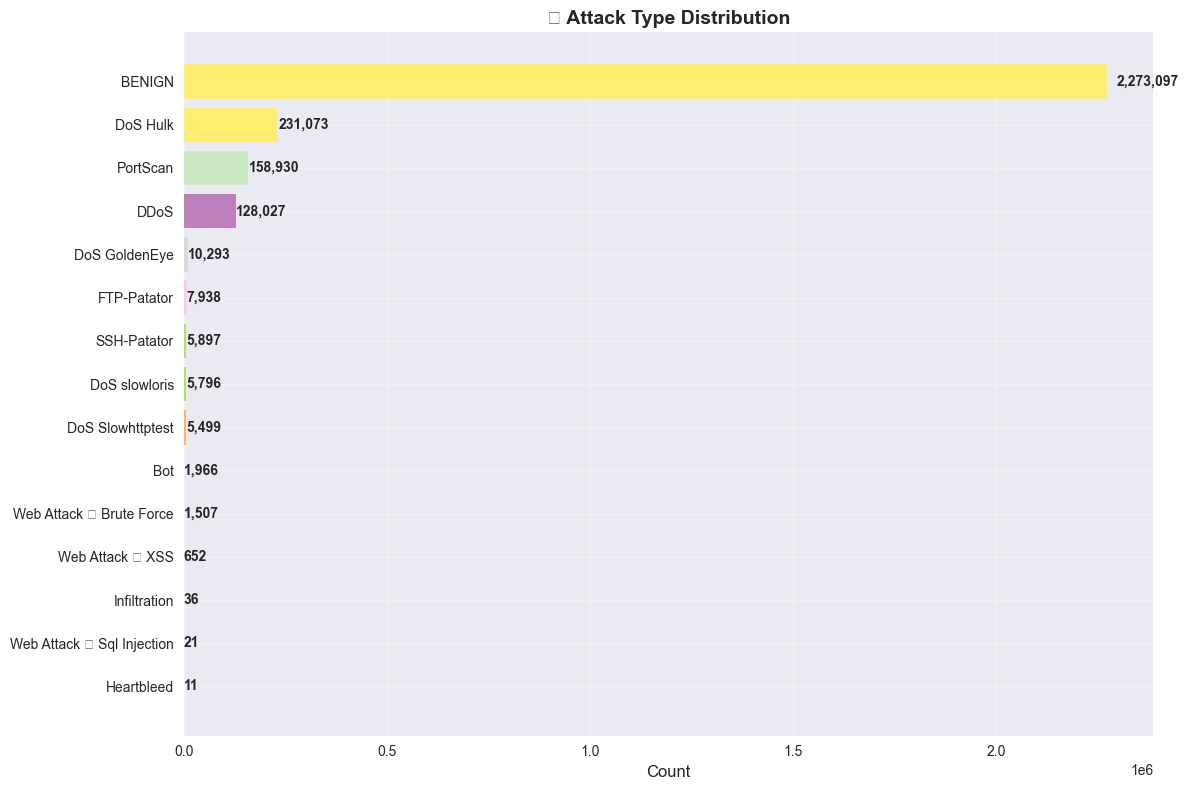

In [4]:
# Attack distribution analysis
attack_counts = combined_df[' Label'].value_counts()
attack_percentages = combined_df[' Label'].value_counts(normalize=True) * 100

print("🎯 Attack Type Distribution:")
for attack, count in attack_counts.items():
    percentage = attack_percentages[attack]
    print(f"  {attack}: {count:,} ({percentage:.2f}%)")

# Horizontal bar chart for better readability
plt.figure(figsize=(12, 8))
attack_counts_sorted = attack_counts.sort_values(ascending=True)
bars = plt.barh(range(len(attack_counts_sorted)), attack_counts_sorted.values, 
                color=plt.cm.Set3(np.linspace(0, 1, len(attack_counts_sorted))))
plt.yticks(range(len(attack_counts_sorted)), attack_counts_sorted.index)
plt.xlabel('Count', fontsize=12)
plt.title('🎯 Attack Type Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add count labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 🎯 Attack Type Distribution
Show the distribution of different attack types in the dataset to understand class imbalance.


🎯 Attack Type Distribution:
  BENIGN: 2,273,097 (80.30%)
  DoS Hulk: 231,073 (8.16%)
  PortScan: 158,930 (5.61%)
  DDoS: 128,027 (4.52%)
  DoS GoldenEye: 10,293 (0.36%)
  FTP-Patator: 7,938 (0.28%)
  SSH-Patator: 5,897 (0.21%)
  DoS slowloris: 5,796 (0.20%)
  DoS Slowhttptest: 5,499 (0.19%)
  Bot: 1,966 (0.07%)
  Web Attack � Brute Force: 1,507 (0.05%)
  Web Attack � XSS: 652 (0.02%)
  Infiltration: 36 (0.00%)
  Web Attack � Sql Injection: 21 (0.00%)
  Heartbleed: 11 (0.00%)


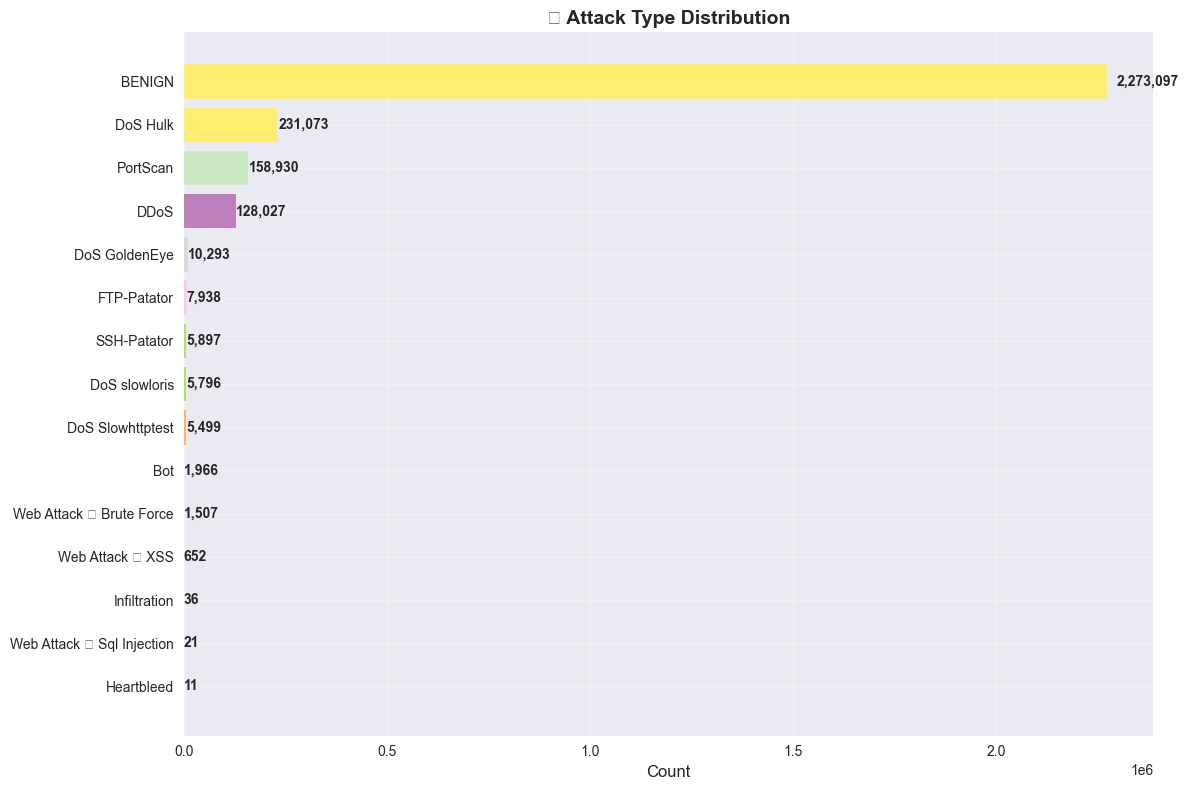

In [5]:
# Attack distribution analysis
attack_counts = combined_df[' Label'].value_counts()
attack_percentages = combined_df[' Label'].value_counts(normalize=True) * 100

print("🎯 Attack Type Distribution:")
for attack, count in attack_counts.items():
    percentage = attack_percentages[attack]
    print(f"  {attack}: {count:,} ({percentage:.2f}%)")

# Horizontal bar chart for better readability
plt.figure(figsize=(12, 8))
attack_counts_sorted = attack_counts.sort_values(ascending=True)
bars = plt.barh(range(len(attack_counts_sorted)), attack_counts_sorted.values, 
                color=plt.cm.Set3(np.linspace(0, 1, len(attack_counts_sorted))))
plt.yticks(range(len(attack_counts_sorted)), attack_counts_sorted.index)
plt.xlabel('Count', fontsize=12)
plt.title('🎯 Attack Type Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add count labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


## ⚖️ Class Imbalance Analysis
Visualize the severe class imbalance between BENIGN and attack traffic.


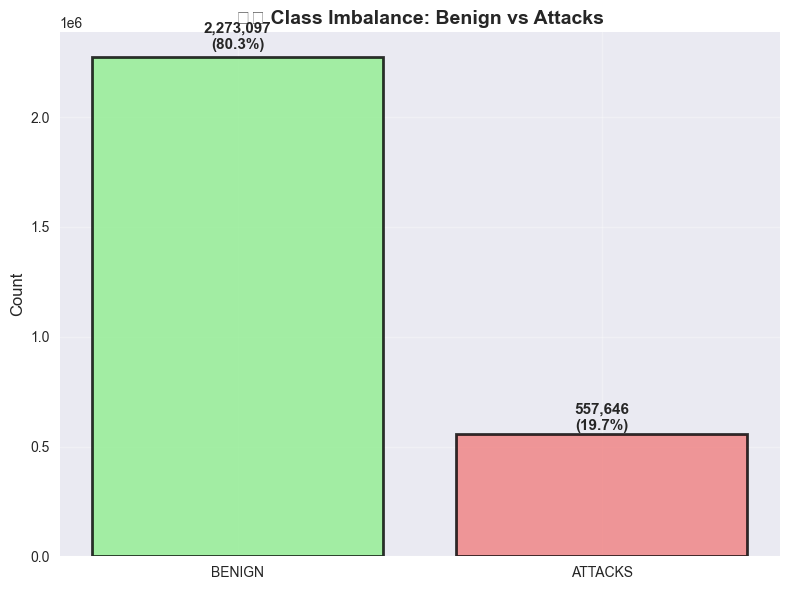


⚖️ Class Imbalance Statistics:
BENIGN: 2,273,097 (80.30%)
ATTACKS: 557,646 (19.70%)
Imbalance Ratio: 4.08:1


In [6]:
# Class imbalance visualization
benign_count = attack_counts.get('BENIGN', 0)
attack_count = attack_counts.sum() - benign_count
total_count = attack_counts.sum()

imbalance_data = [benign_count, attack_count]
imbalance_labels = ['BENIGN', 'ATTACKS']
colors_imbalance = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
bars = plt.bar(imbalance_labels, imbalance_data, color=colors_imbalance, 
               edgecolor='black', linewidth=2, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.title('⚖️ Class Imbalance: Benign vs Attacks', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add percentage labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_count) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height):,}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n⚖️ Class Imbalance Statistics:")
print(f"BENIGN: {benign_count:,} ({benign_count/total_count*100:.2f}%)")
print(f"ATTACKS: {attack_count:,} ({attack_count/total_count*100:.2f}%)")
print(f"Imbalance Ratio: {benign_count/attack_count:.2f}:1")


## 🔍 Data Quality Analysis
Check for missing values, -1 placeholders, and other data quality issues.


🔍 Data Quality Analysis:
Missing Values: 1,358
-1 Placeholder Values: 2,445,838
Infinite Values: 4,376
Duplicate Rows: 308,381


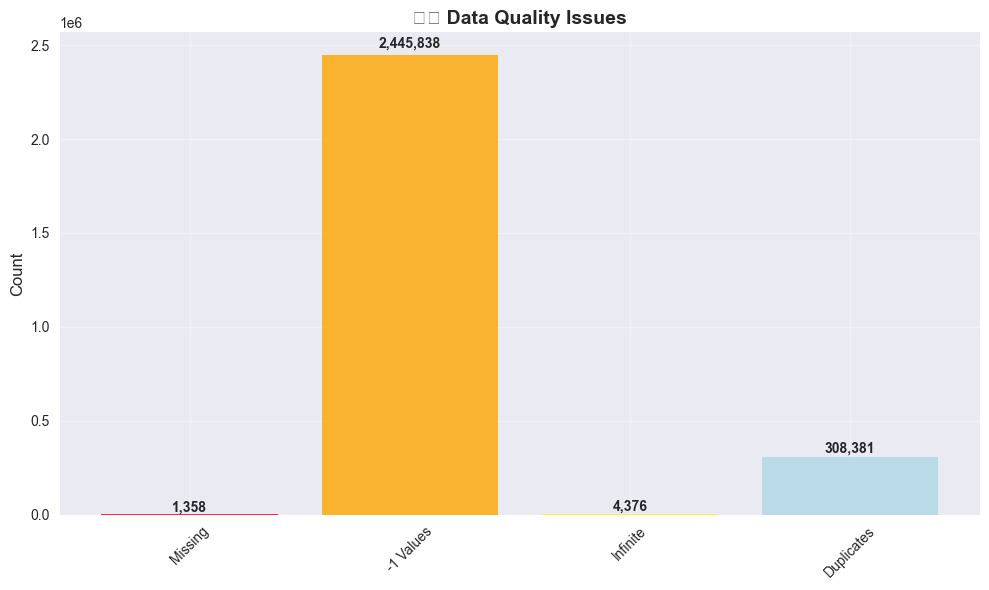

In [7]:
# Data quality analysis
missing_values = combined_df.isnull().sum().sum()
minus_one_values = (combined_df == -1).sum().sum()
inf_values = np.isinf(combined_df.select_dtypes(include=[np.number])).sum().sum()
duplicate_rows = combined_df.duplicated().sum()

print("🔍 Data Quality Analysis:")
print(f"Missing Values: {missing_values:,}")
print(f"-1 Placeholder Values: {minus_one_values:,}")
print(f"Infinite Values: {inf_values:,}")
print(f"Duplicate Rows: {duplicate_rows:,}")

# Visualize data quality issues
quality_issues = ['Missing', '-1 Values', 'Infinite', 'Duplicates']
quality_counts = [missing_values, minus_one_values, inf_values, duplicate_rows]
colors = ['red', 'orange', 'yellow', 'lightblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(quality_issues, quality_counts, color=colors, alpha=0.8)
plt.title('⚠️ Data Quality Issues', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 📊 Feature Variance Analysis
Identify the most important features based on variance to understand feature importance.


📊 Feature Variance Analysis (Top 20):
Total numeric features: 78
High variance features (>1): 57


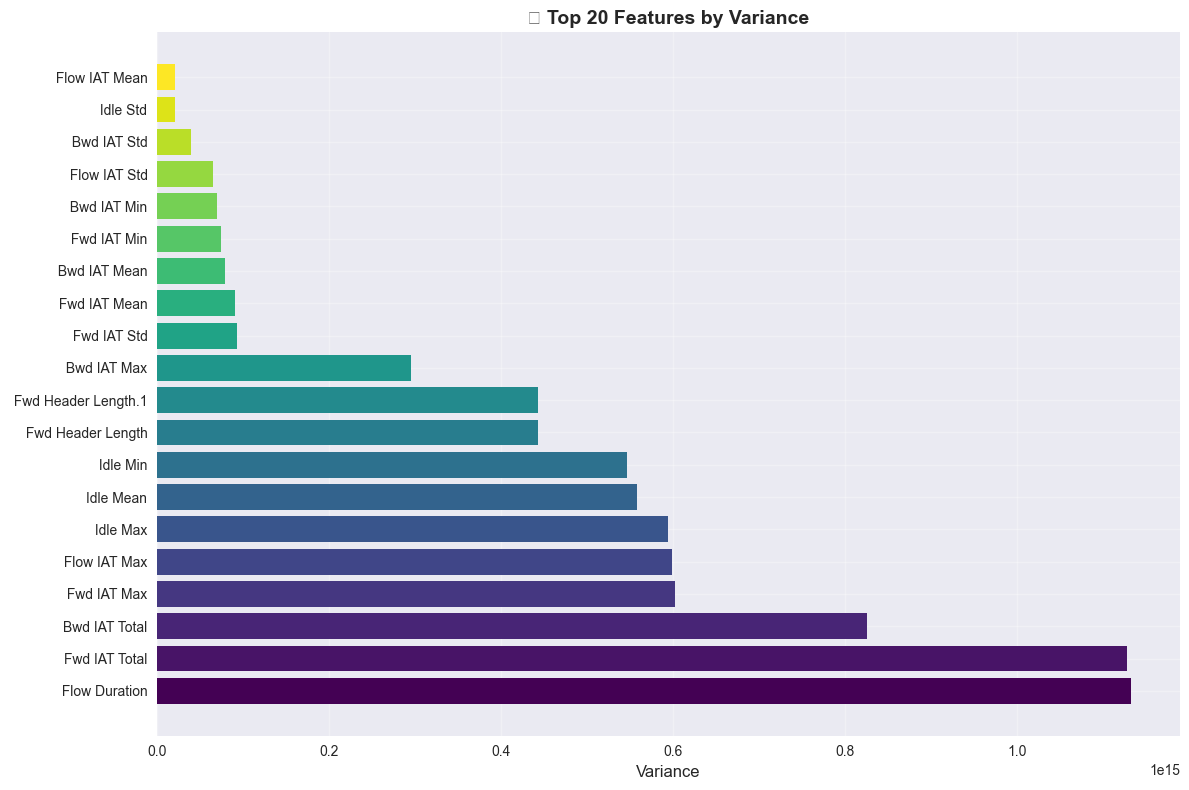

In [8]:
# Feature variance analysis
numeric_columns = combined_df.select_dtypes(include=[np.number]).columns.tolist()
if ' Label' in numeric_columns:
    numeric_columns.remove(' Label')

feature_variance = combined_df[numeric_columns].var().sort_values(ascending=False)
top_variance = feature_variance.head(20)

print(f"📊 Feature Variance Analysis (Top 20):")
print(f"Total numeric features: {len(numeric_columns)}")
print(f"High variance features (>1): {len(feature_variance[feature_variance > 1])}")

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_variance)), top_variance.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(top_variance))))
plt.yticks(range(len(top_variance)), top_variance.index)
plt.xlabel('Variance', fontsize=12)
plt.title('📊 Top 20 Features by Variance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 📦 Feature Distribution by Attack Type
Show how different features vary across attack types using box plots.


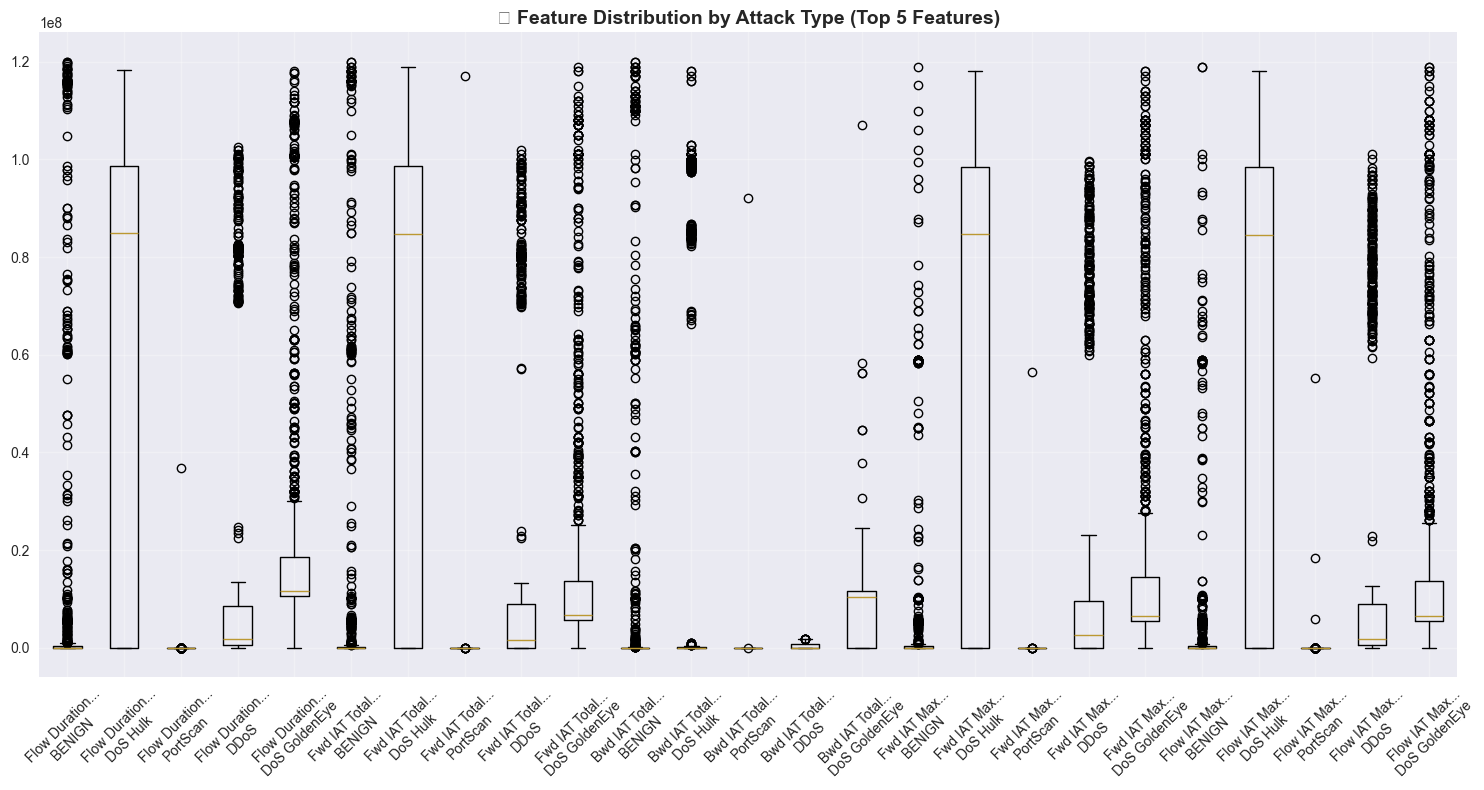

In [9]:
# Feature distribution by attack type
top_5_features = feature_variance.head(5).index.tolist()
top_5_attacks = attack_counts.head(5).index.tolist()

# Create box plot data
box_data = []
box_labels = []
for feature in top_5_features:
    for attack in top_5_attacks:
        data = combined_df[combined_df[' Label'] == attack][feature].dropna()
        if len(data) > 0:
            # Sample for performance
            sample_data = data.sample(min(1000, len(data)))
            box_data.append(sample_data)
            box_labels.append(f"{feature[:15]}...\n{attack}")

if box_data:
    plt.figure(figsize=(15, 8))
    plt.boxplot(box_data, labels=box_labels)
    plt.title('📦 Feature Distribution by Attack Type (Top 5 Features)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for box plot visualization")


## 🔥 Correlation Heatmap
Visualize feature correlations to identify highly correlated features that might need removal.


🔥 Correlation Analysis:
Found 101 highly correlated feature pairs (|correlation| > 0.8)
Top 5 highly correlated pairs:
  1.  Flow Duration <-> Fwd IAT Total: 0.999
  2.  Flow Duration <-> Bwd IAT Total: 0.823
  3.  Total Fwd Packets <->  Total Backward Packets: 0.999
  4.  Total Fwd Packets <->  Total Length of Bwd Packets: 0.997
  5.  Total Fwd Packets <-> Subflow Fwd Packets: 1.000


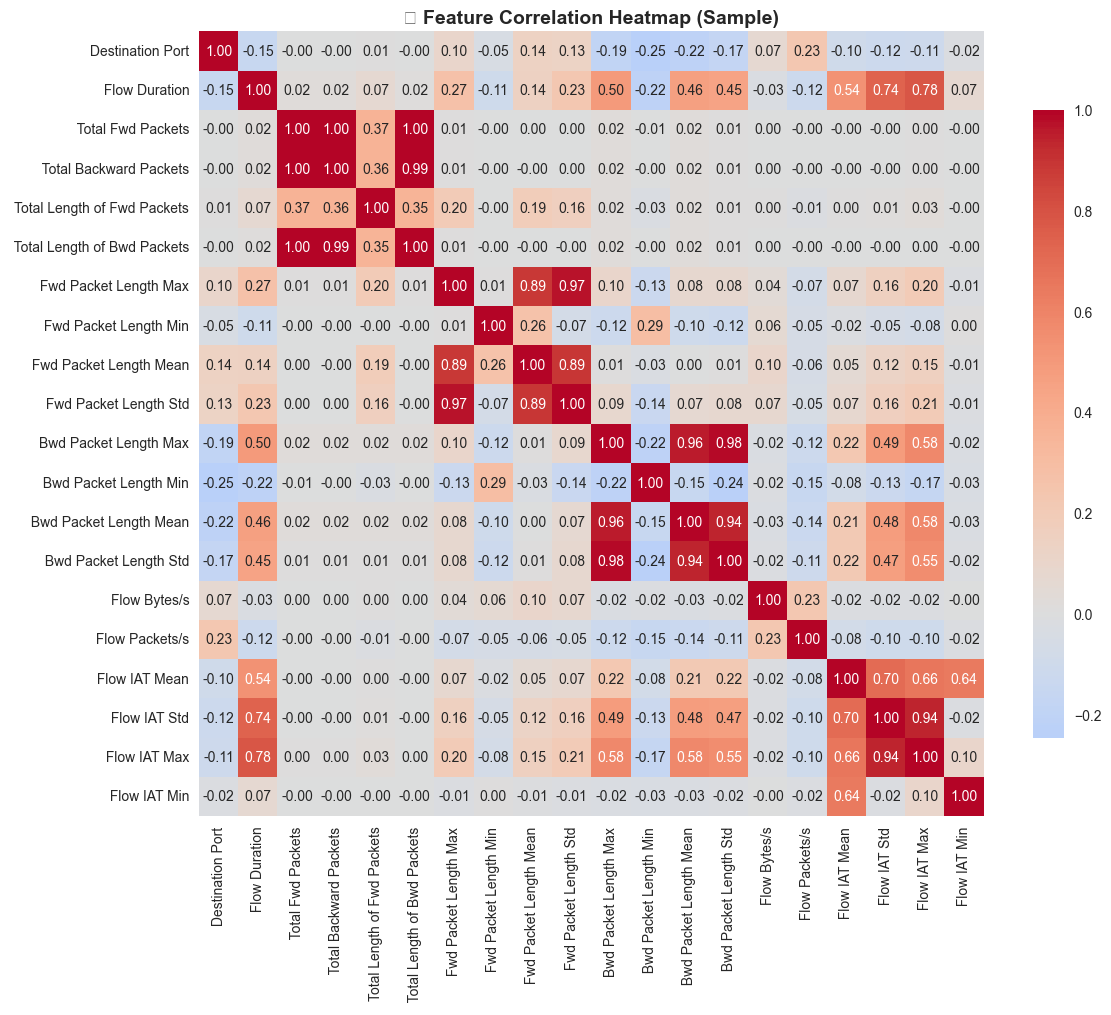

In [10]:
# Correlation analysis
numeric_columns = combined_df.select_dtypes(include=[np.number]).columns.tolist()
if ' Label' in numeric_columns:
    numeric_columns.remove(' Label')

correlation_matrix = combined_df[numeric_columns].corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                corr_val
            ))

print(f"🔥 Correlation Analysis:")
print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|correlation| > 0.8)")
print("Top 5 highly correlated pairs:")
for i, (feat1, feat2, corr) in enumerate(high_corr_pairs[:5]):
    print(f"  {i+1}. {feat1} <-> {feat2}: {corr:.3f}")

# Sample correlation heatmap (first 20 features for visibility)
sample_features = numeric_columns[:20]
sample_corr = combined_df[sample_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(sample_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('🔥 Feature Correlation Heatmap (Sample)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 📋 Summary and Recommendations
Provide a comprehensive summary of findings and actionable recommendations for preprocessing.


In [11]:
# Comprehensive summary
print("📋 === EDA SUMMARY AND RECOMMENDATIONS ===")
print(f"\n📊 Dataset Overview:")
print(f"  Total Records: {len(combined_df):,}")
print(f"  Total Features: {len(combined_df.columns) - 1}")
print(f"  Attack Types: {len(combined_df[' Label'].unique())}")
print(f"  Memory Usage: {combined_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🎯 Class Distribution:")
for attack, count in attack_counts.head(5).items():
    percentage = attack_percentages[attack]
    print(f"  {attack}: {count:,} ({percentage:.2f}%)")

print(f"\n🔍 Data Quality Issues:")
print(f"  Missing Values: {missing_values:,}")
print(f"  -1 Placeholder Values: {minus_one_values:,}")
print(f"  Infinite Values: {inf_values:,}")
print(f"  Duplicate Rows: {duplicate_rows:,}")

print(f"\n📊 Feature Analysis:")
print(f"  Highly Correlated Pairs: {len(high_corr_pairs)}")

print(f"\n💡 === PREPROCESSING RECOMMENDATIONS ===")
print("1. Data Cleaning:")
print("   - Replace -1 values with median/mean")
print("   - Handle missing values")
print("   - Remove infinite values")
print("   - Remove duplicate rows")

print("\n2. Feature Engineering:")
print("   - Remove highly correlated features")
print("   - Apply feature scaling (MinMaxScaler)")
print("   - Consider log transformation for skewed features")

print("\n3. Class Imbalance:")
print("   - Use SMOTE for oversampling")
print("   - Apply class weights during training")
print("   - Use stratified train-test split")

print(f"\n✅ EDA Analysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


📋 === EDA SUMMARY AND RECOMMENDATIONS ===

📊 Dataset Overview:
  Total Records: 2,830,743
  Total Features: 78
  Attack Types: 15
  Memory Usage: 1833.92 MB

🎯 Class Distribution:
  BENIGN: 2,273,097 (80.30%)
  DoS Hulk: 231,073 (8.16%)
  PortScan: 158,930 (5.61%)
  DDoS: 128,027 (4.52%)
  DoS GoldenEye: 10,293 (0.36%)

🔍 Data Quality Issues:
  Missing Values: 1,358
  -1 Placeholder Values: 2,445,838
  Infinite Values: 4,376
  Duplicate Rows: 308,381

📊 Feature Analysis:
  Highly Correlated Pairs: 101

💡 === PREPROCESSING RECOMMENDATIONS ===
1. Data Cleaning:
   - Replace -1 values with median/mean
   - Handle missing values
   - Remove infinite values
   - Remove duplicate rows

2. Feature Engineering:
   - Remove highly correlated features
   - Apply feature scaling (MinMaxScaler)
   - Consider log transformation for skewed features

3. Class Imbalance:
   - Use SMOTE for oversampling
   - Apply class weights during training
   - Use stratified train-test split

✅ EDA Analysis comple